# Project 5: Virus Propagation

## Option 1: Virus Propagation on Static Networks

In [7]:
!pip install igraph
!pip install scipy
!pip install numpy

In [12]:
from igraph import *
from os.path import join
from os import listdir
import scipy.linalg as sc
from pylab import *
import numpy as np
import random
import operator
import time

import virus_propagation as vp

In [14]:
beta1 = 0.20
beta2 = 0.01
delta1 = 0.70
delta2 = 0.60
k1 = 200

In [ ]:
g = vp.get_graph("C:/Users/Md Mirajul Islam/Documents/PhD/Fall 2022/CSC 591 340 Graph Data Mining/Projects/Project_5/static.network")
highest_e_val = vp.highest_eigen_value(g)
eff_strength1 = vp.effective_strength(highest_e_val,beta1,delta1)
print("Highest Eigen Value = {}".format(highest_e_val))
print("The effective strength of the virus for Beta = {} and Delta = {} is {}".format(beta1,delta1,eff_strength1))
if eff_strength1 > 1:
    print("The infection will spread across the network.")
else:
    print("The virus will die quickly.")


###### a. Will the infection spread across the network (i.e., result on an epidemic), or will it die quickly?

Yes the infection will spread across the network as the effective strength for given beta and delta values is 12.530 > 1.

###### b. Keeping δ fixed, analyze how the value of β affects the effective strength of the virus (suggestion: plot your results). What is the minimum transmission probability (β) that results in a network-wide epidemic?

In [10]:
%matplotlib inline

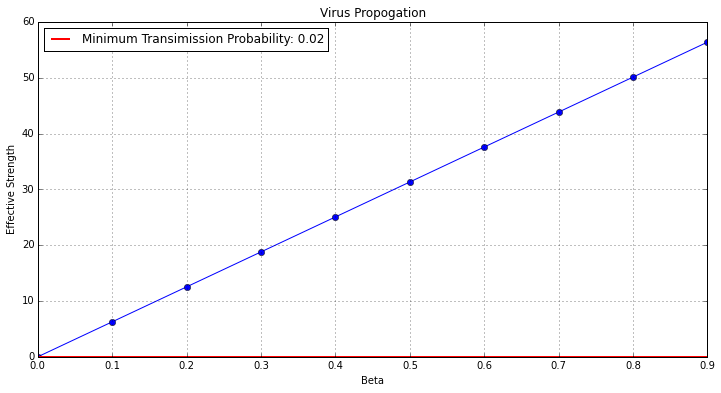

Minimum transmission probability: 0.016


In [26]:
reload(vp)
vp.plot_beta(highest_e_val,delta1,"",False)

###### c. Keeping β fixed, analyze how the value of δ affects the effective strength of the virus (suggestion: plot your results). What is the maximum healing probability (δ) that results in a network-wide epidemic?

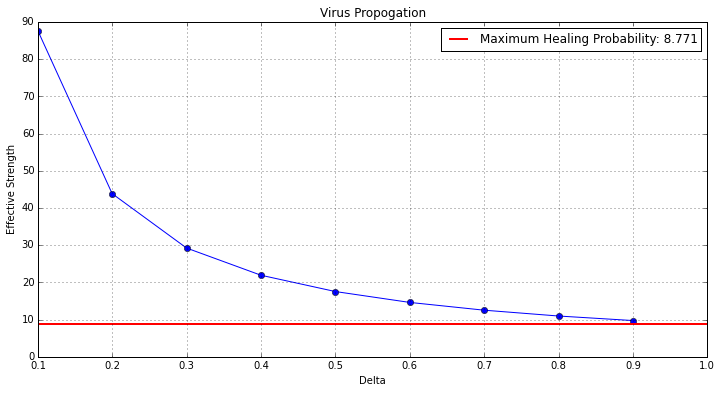

Maximum healing probability: 8.771


In [27]:
vp.plot_delta(highest_e_val,beta1,"",False)

###### d. Repeat (1), (1a), (1b) and (1c) with β = β2, and δ = δ2.

In [17]:
eff_strength2 = vp.effective_strength(highest_e_val,beta2,delta2)
print "The effective strength of the virus for Beta = %.2f and Delta = %.2f is %.3f " %(beta2,delta2,eff_strength2)
if eff_strength2 > 1:
    print "The infection will spread across the network."
else:
    print "The virus will die quickly."

The effective strength of the virus for Beta = 0.01 and Delta = 0.60 is 0.731 
The virus will die quickly.


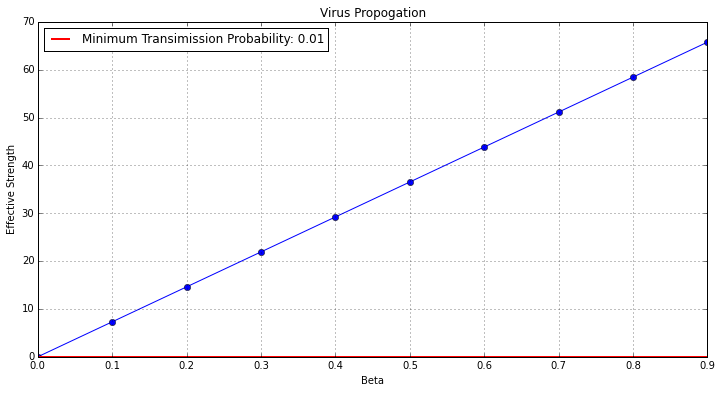

Minimum transmission probability: 0.014


In [28]:
vp.plot_beta(highest_e_val,delta2,"",False)

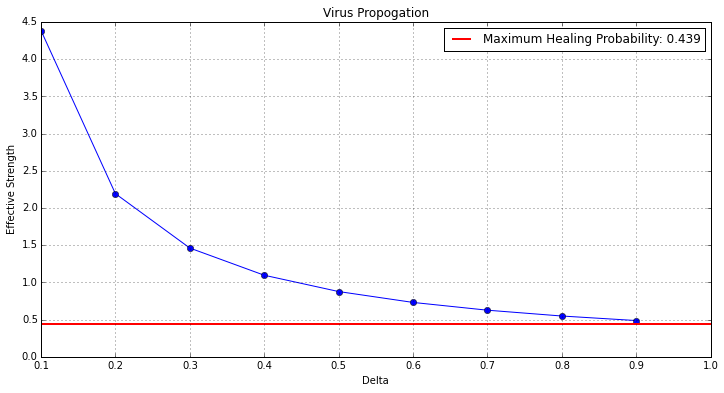

Maximum healing probability: 0.439


In [30]:
vp.plot_delta(highest_e_val,beta2,"",False)

###### Q2. Simulation of Virus Propagation

###### a. Run the simulation program 10 times for the static contact network provided (static.network), with β = β1, δ = δ1, c = n/10 (n is the number of nodes in the network), and t = 100.

In [33]:
reload(vp)
frac_infected = vp.run_simulation(g,beta1,delta1,100,len(g.vs)/10,10)

###### b. Plot the average (over the 10 simulations) fraction of infected nodes at each time step. Did the infection spread across the network, or did it die quickly? Do the results of the simulation agree with your conclusions in (1a)?

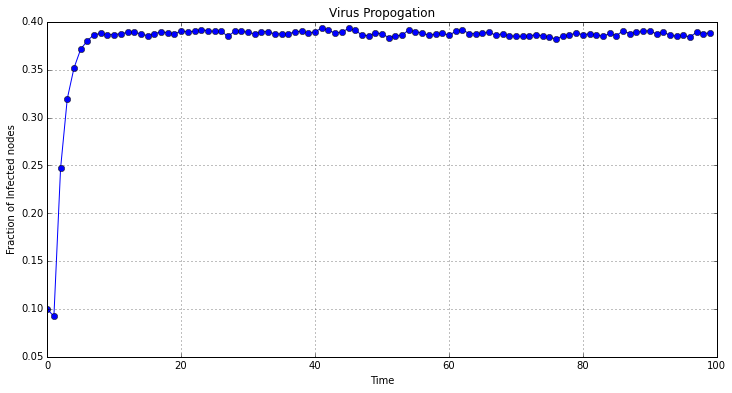

In [35]:
vp.plot_simulation(frac_infected,100,"",False)

The infection spread acoss the network and didn't die even at t=100 as can be seen from the graph above.

Yes the results of simulation agree with the conclusion in 1a.

###### c. Repeat (2a) and (2b) with β = β2, and δ = δ2.

In [36]:
frac_infected1 = vp.run_simulation(g,beta2,delta2,100,len(g.vs)/10,10)

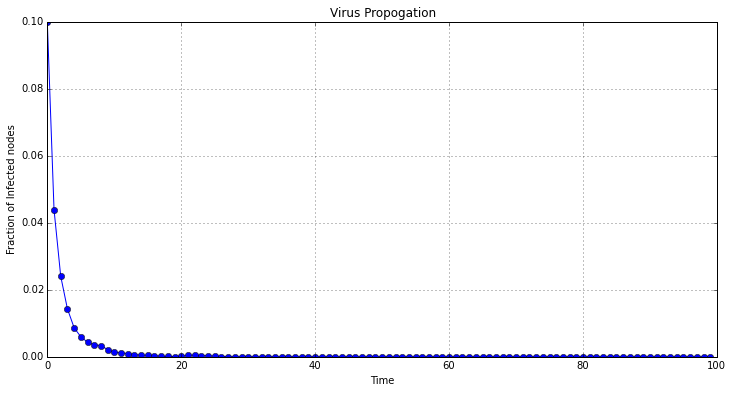

In [38]:
vp.plot_simulation(frac_infected1,100,"",False)

The infection didnt spread acoss the network and died quickly as can be seen from the graph above.

Yes the results of simulation agree with the conclusion in 1d.

###### Q3. Write a program that implements an immunization policy to prevent the virus from spreading across the network. Given a number of available vaccines (k) and a contact network, your program should select k nodes to immunize. The immunized nodes (and their incident edges) are then removed from the contact network.

###### a. What do you think would be the optimal immunization policy? What would be its time complexity? Would it be reasonable to implement this policy? Justify.

The optimal immunization policy is to find the subset of k nodes with the largest eigen-drop among all possible subsets. 

The time complexity of this will be very high since we have to first find the subset of size k from all nodes and then find the coresponding eigen drop.

Hence considering the combinatorial nature of the solution, it is not reasonable to implement this policy. 

###### b. What do you think is the intuition behind this heuristic?

Policy A: Select k random nodes for immunization.
    
    This is a very random policy and is simple to implement. The intuition is to randomly select k nodes and immunize them with a hope that the epidemic might get contained.

Policy B: Select the k nodes with highest degree for immunization.
    
    This policy is intuitional and can be understood easily. The nodes which have highest degree can infect highest number of neighbours. Hence, we should immunize nodes with highest degree first in order to contain the epidemic. However, this policy will miss low degree nodes which can be bridges between two tightly connected networks and can spread the virus even though the degree is low.
    
Policy C: Select the node with the highest degree for immunization. Remove this node (and its incident edges) from the contact network. Repeat until all vaccines are administered.
    
    This policy removes nodes with highest degree iteratively. This policy might turn out better then previous one as it reduces the connectivity of graph better then previous method. 
    
Policy D: Find the eigenvector corresponding to the largest eigenvalue of the contact network’s adjacency matrix. Find the k largest (absolute) values in the eigenvector. Select the k nodes at the corresponding positions in the eigenvector.
    
    Larget eigen value signifies the overall connectivity of the graph and the average degree of the graph. The principal vector signifies the relative importance of vertices. Removing the k vertices corresponding to k largest values in eigen vector, reduces the connectivity of graph. If connectivity is reduced then the virus may not spread. This is the intuition behind this policy.
    

###### c. Write a pseudocode for this heuristic immunization policy. What is its time complexity?

Policy A: Select k random nodes for immunization.


In [53]:
def random_immunize(g,k):
    g1 = g.copy()
    nodes = random.sample(range(len(g1.vs)),k)
    g1.delete_vertices(nodes)
    return g1


Policy B: Select the k nodes with highest degree for immunization.

In [66]:
def high_degree_immunize(g,k):
    g1 = g.copy()
    degree = {v: g1.degree(v) for v in g1.vs}
    sorted_deg = sorted(degree.keys(),key = lambda s : degree[s],reverse = True)
    g1.delete_vertices(sorted_deg[:k])
    return g1

Policy C: Select the node with the highest degree for immunization. Remove this node (and its incident edges) from the contact network. Repeat until all vaccines are administered.

In [70]:
def high_degree_immunize_iteratively(g,k):
    g1 = g.copy()
    for i in range(k):
        g1=high_degree_immunize(g1,1)
    return g1;


Policy D: Find the eigenvector corresponding to the largest eigenvalue of the contact network’s adjacency matrix. Find the k largest (absolute) values in the eigenvector. Select the k nodes at the corresponding positions in the eigenvector.

In [87]:
def largest_eig_vec_immunize(g,k):
    g1 = g.copy()
    largest_eig = sc.eigh(g1.get_adjacency().data,eigvals=(len(g1.vs)-1,len(g1.vs)-1))
    eig_vec = {i: largest_eig[1][i] for i in range(len(largest_eig[1]))}
    sorted_deg = sorted(eig_vec.keys(),key = lambda s : abs(eig_vec[s][0]),reverse = True)
    max_eig_vertices =  [g1.vs[i] for i in sorted_deg][:k]
    g1.delete_vertices(max_eig_vertices)
    return g1

###### d. Given k = k1, β = β1, and δ = δ1, calculate the effective strength (s) of the virus on the immunized contact network (i.e., contact network without immunized nodes). Did the immunization policy prevented a network-wide epidemic?

Policy A: Select k random nodes for immunization.

In [58]:
g_random = random_immunize(g,k1)
highest_eig_val_random = vp.highest_eigen_value(g_random)
print("Highest Eigen Value is: {} ".format(highest_eig_val_random))

eff_strength_random = vp.effective_strength(highest_eig_val_random,beta1,delta1)
print("The effective strength of the virus for Beta = {} and Delta = {} is {}".format(beta1,delta1,eff_strength_random))

if eff_strength_random > 1:
    print("The infection will spread across the network.The immunization policy didn't prevent a network-wide epidemic")
else:
    print("The virus will die quickly and hence the immunization policy prevented a network-wide epidemic")


Highest Eigen Value is  42.459495806
The effective strength of the virus for Beta = 0.20 and Delta = 0.70 is 12.131 
The infection will spread across the network.The immunization policy didn't prevent a network-wide epidemic


Policy B: Select the k nodes with highest degree for immunization.

In [68]:
g_highest = high_degree_immunize(g,k1)
highest_eig_val_highdegree = vp.highest_eigen_value(g_highest)
print("Highest Eigen Value is: {}".format(highest_eig_val_highdegree))

eff_strength_highdegree = vp.effective_strength(highest_eig_val_highdegree,beta1,delta1)
print("The effective strength of the virus for Beta = {} and Delta = {} is {}".format(beta1,delta1,eff_strength_highdegree))

if eff_strength_highdegree > 1:
    print("The infection will spread across the network.The immunization policy didn't prevent a network-wide epidemic")
else:
    print("The virus will die quickly and hence the immunization policy prevented a network-wide epidemic")


Highest Eigen Value is  3.78096418082
The effective strength of the virus for Beta = 0.20 and Delta = 0.70 is 1.080 
The infection will spread across the network.The immunization policy didn't prevent a network-wide epidemic


However, The virus can be contained as the effective strength is equivalent to 1.

Policy C: Select the node with the highest degree for immunization. Remove this node (and its incident edges) from the contact network. Repeat until all vaccines are administered.

In [74]:
g_highest_iter = high_degree_immunize_iteratively(g,k1)
highest_eig_val_highd_iter = vp.highest_eigen_value(g_highest_iter)
print("Highest Eigen Value is: {}".format(highest_eig_val_highd_iter))

eff_strength_highd_iter = vp.effective_strength(highest_eig_val_highd_iter,beta1,delta1)
print("The effective strength of the virus for Beta = {} and Delta = {} is {}".format(beta1,delta1,eff_strength_highd_iter))

if eff_strength_highd_iter > 1:
    print("The infection will spread across the network.The immunization policy didn't prevent a network-wide epidemic")
else:
    print("The virus will die quickly and hence the immunization policy prevented a network-wide epidemic")


Highest Eigen Value is  3.5876572494
The effective strength of the virus for Beta = 0.20 and Delta = 0.70 is 1.025 
The infection will spread across the network.The immunization policy didn't prevent a network-wide epidemic


However, The virus can be contained as the effective strength is equivalent to 1.

Policy D: Find the eigenvector corresponding to the largest eigenvalue of the contact network’s adjacency matrix. Find the k largest (absolute) values in the eigenvector. Select the k nodes at the corresponding positions in the eigenvector.

In [89]:
g_highest_eig = largest_eig_vec_immunize(g,k1)
highest_eig_val_higheig = vp.highest_eigen_value(g_highest_eig)
print("Highest Eigen Value is: {}".format(highest_eig_val_higheig))

eff_strength_higheig = vp.effective_strength(highest_eig_val_higheig,beta1,delta1)
print("The effective strength of the virus for Beta = {} and Delta = {} is {}".format(beta1,delta1,eff_strength_higheig))

if highest_eig_val_higheig > 1:
    print("The infection will spread across the network.The immunization policy didn't prevent a network-wide epidemic")
else:
    print("The virus will die quickly and hence the immunization policy prevented a network-wide epidemic")


Highest Eigen Value is  10.746847588
The effective strength of the virus for Beta = 0.20 and Delta = 0.70 is 3.071 
The infection will spread across the network.The immunization policy didn't prevent a network-wide epidemic


###### e. Keeping β and δ fixed, analyze how the value of k affects the effective strength of the virus on the immunized contact network (suggestion: plot your results). Estimate the minimum number of vaccines necessary to prevent a network-wide epidemic.

In [105]:
k_list = range(4000,5800,100)
reload(vp)

<module 'virus_propagation' from 'virus_propagation.py'>

Policy A: Select k random nodes for immunization.


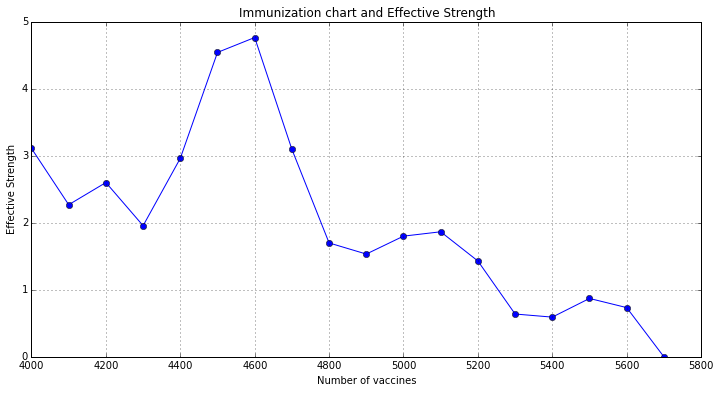

In [106]:
vp.plot_k_variations(g,k_list,beta1,delta1,"A","",False)

###### The minimum number of vaccines required to prevent network-wide epidemic is around 5250 to 5300 as can be seen from the graph.

Policy B: Select the k nodes with highest degree for immunization.

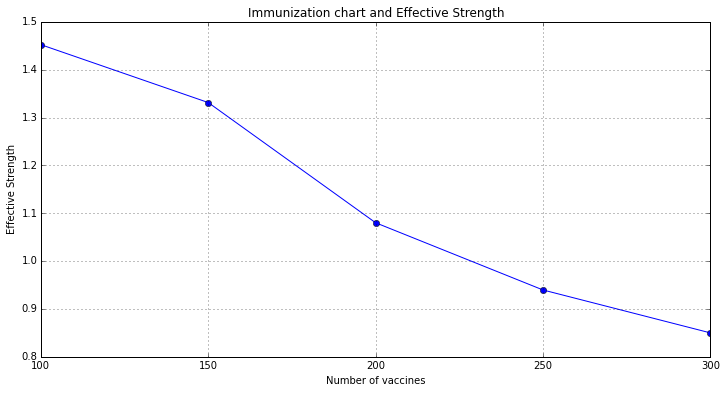

In [107]:
k_list = range(100,350,50)
vp.plot_k_variations(g,k_list,beta1,delta1,"B","",False)

###### The minimum number of vaccines required to immunize the contact netowork is 230 to 240

Policy C: Select the node with the highest degree for immunization. Remove this node (and its incident edges) from the contact network. Repeat until all vaccines are administered.

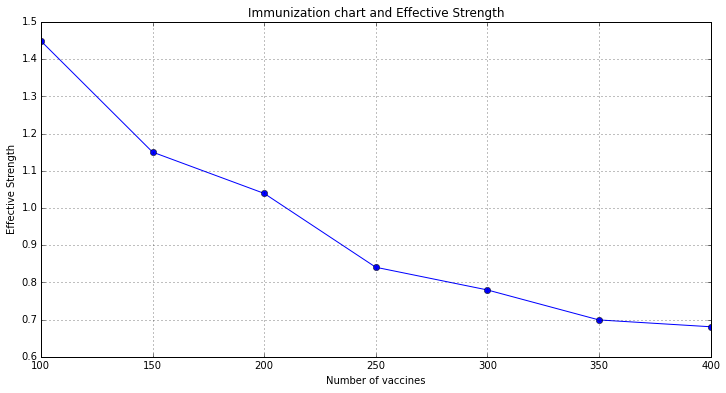

In [109]:
k_list = range(100,450,50)
vp.plot_k_variations(g,k_list,beta1,delta1,"C","",False)

###### The minimum number of vaccines required to prevent network-wide epidemic is around 215 to 225

Policy D: Find the eigenvector corresponding to the largest eigenvalue of the contact network’s adjacency matrix. Find the k largest (absolute) values in the eigenvector. Select the k nodes at the corresponding positions in the eigenvector.

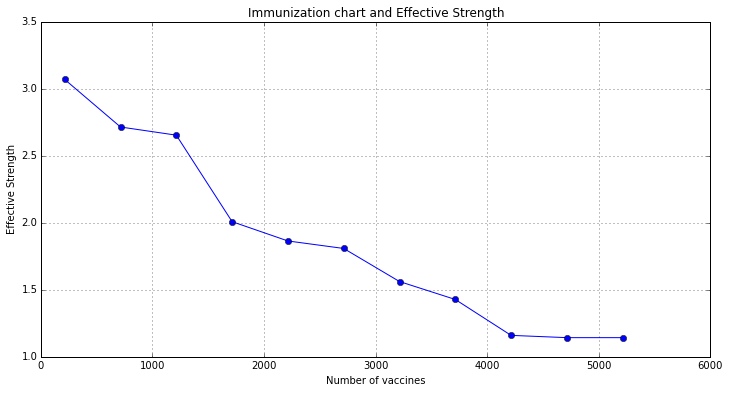

In [120]:
k_list = range(215,5715,500)
vp.plot_k_variations(g,k_list,beta1,delta1,"D","",False)

###### The minimum number of vaccines required to prevent network - wide epidemic using by this policy will be 5715, as the effective strength of the virus is still > 1

###### f. Given k = k1, β = β1, δ = δ1, c = n/10, and t = 100, run the simulation from problem (2) for the immunized contact network 10 times. Plot the average fraction of infected nodes at each time step. Do the results of the simulation agree with your conclusions in (3d)?

Policy A: Select k random nodes for immunization.


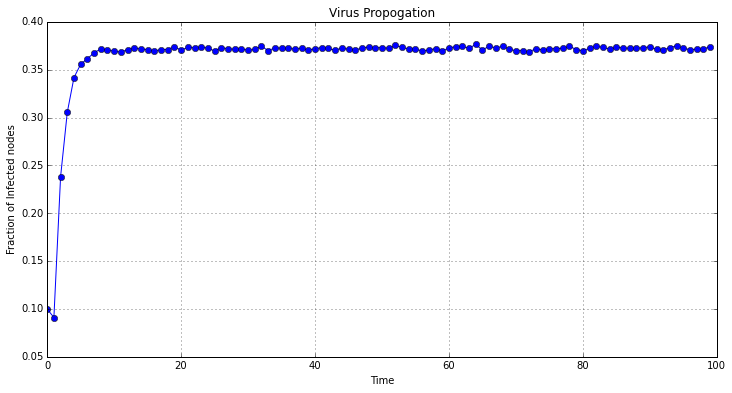

In [121]:
g_random = random_immunize(g,k1)
frac_infected = vp.run_simulation(g_random,beta1,delta1,100,len(g_random.vs)/10,10)
vp.plot_simulation(frac_infected,100,"",False)


###### Yes, the results confirm with the conclusion in 3d. The effective strength of the virus was >> 1 and hence there would be network-wide epidemic as can be seen from the graph above.

Policy B: Select the k nodes with highest degree for immunization.

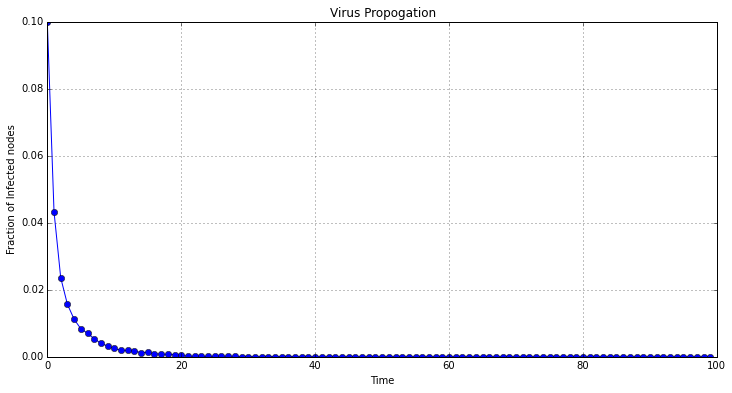

In [122]:
g_highest = high_degree_immunize(g,k1)
frac_infected = vp.run_simulation(g_highest,beta1,delta1,100,len(g_highest.vs)/10,10)
vp.plot_simulation(frac_infected,100,"",False)

###### Yes, the results confirm with the conclusion in 3d. The effective strength of the virus was ~ 1 and hence the virus would die and epidemic will be prevented.

Policy C: Select the node with the highest degree for immunization. Remove this node (and its incident edges) from the contact network. Repeat until all vaccines are administered.

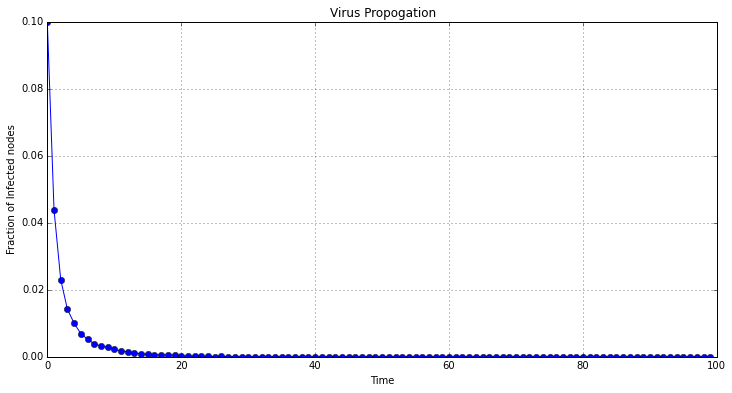

In [123]:
g_highest_iter = high_degree_immunize_iteratively(g,k1)
frac_infected = vp.run_simulation(g_highest_iter,beta1,delta1,100,len(g_highest_iter.vs)/10,10)
vp.plot_simulation(frac_infected,100,"",False)

###### Yes, the results confirm with the conclusion in 3d. The effective strength of the virus was ~ 1 and hence the virus would die and epidemic will be prevented.

Policy D: Find the eigenvector corresponding to the largest eigenvalue of the contact network’s adjacency matrix. Find the k largest (absolute) values in the eigenvector. Select the k nodes at the corresponding positions in the eigenvector.

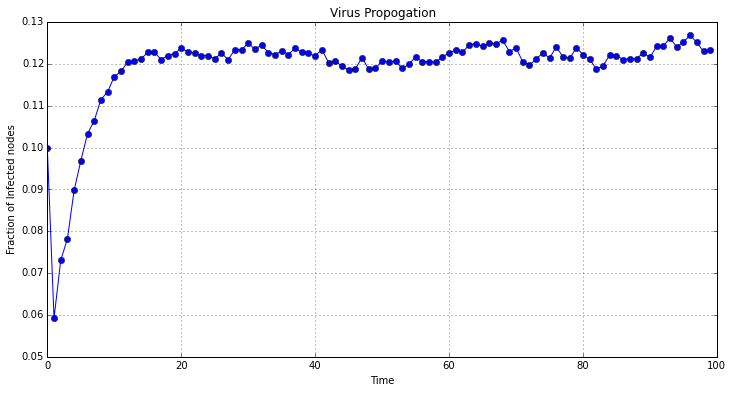

In [124]:
g_highest_eig = largest_eig_vec_immunize(g,k1)
frac_infected = vp.run_simulation(g_highest_eig,beta1,delta1,100,len(g_highest_eig.vs)/10,10)
vp.plot_simulation(frac_infected,100,"",False)

###### Yes, the results confirm with the conclusion in 3d. The effective strength of the virus was >> 1 and hence there would be network-wide epidemic as can be seen from the graph above.